In [297]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

data=pd.read_csv("Churn_Modelling.csv")
data.sort_values(["Age"], ascending=[False],inplace=True)

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6443,6444,15764927,Rogova,753,France,Male,92,3,121513.31,1,0,1,195563.99,0
6759,6760,15660878,T'ien,705,France,Male,92,1,126076.24,2,1,1,34436.83,0
2458,2459,15813303,Rearick,513,Spain,Male,88,10,0.00,2,1,1,52952.24,0
3033,3034,15578006,Yao,787,France,Female,85,10,0.00,2,1,1,116537.96,0
3387,3388,15798024,Lori,537,Germany,Male,84,8,92242.34,1,1,1,186235.98,0
3531,3532,15653251,Hickey,408,France,Female,84,8,87873.39,1,0,0,188484.52,1
9309,9310,15621644,Lombardi,678,Germany,Male,83,6,123356.63,1,0,1,92934.41,0
766,767,15810864,Williamson,700,France,Female,82,2,0.00,2,0,1,182055.36,0
4931,4932,15772341,Hs?eh,682,Germany,Male,81,6,122029.15,1,1,1,50783.88,0
7526,7527,15800554,Perry,850,France,Female,81,1,0.00,2,1,1,59568.24,0


In [298]:
data.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
843,844,15672012,Jen,773,Spain,Female,41,5,0.00,1,1,0,28266.90,1
9416,9417,15795370,Mazure,648,Germany,Male,37,6,131753.41,1,1,0,86894.67,0
5550,5551,15777784,Tu,733,France,Female,44,6,168165.84,1,0,1,197193.49,0
8024,8025,15743051,Hamilton,694,France,Male,30,10,144684.03,1,1,1,31805.49,0
7310,7311,15740487,Ross,627,France,Female,41,6,0.00,3,1,1,138700.75,1
410,411,15566594,McKenzie,709,Spain,Male,23,10,0.00,2,0,0,129590.18,0
20,21,15577657,McDonald,732,France,Male,41,8,0.00,2,1,1,170886.17,0
9197,9198,15611947,Banks,557,France,Male,34,3,83074.00,1,1,0,132673.22,0
6618,6619,15756301,Daniels,636,Germany,Female,29,3,97325.15,1,0,1,131924.38,0
3055,3056,15602373,White,812,France,Male,44,4,115049.15,2,1,0,165038.41,0


In [299]:
data.shape

(10000, 14)

In [300]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [301]:
data.drop(["RowNumber","CustomerId"],axis=1,inplace=True)

In [302]:
data.head(10)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6443,Rogova,753,France,Male,92,3,121513.31,1,0,1,195563.99,0
6759,T'ien,705,France,Male,92,1,126076.24,2,1,1,34436.83,0
2458,Rearick,513,Spain,Male,88,10,0.00,2,1,1,52952.24,0
3033,Yao,787,France,Female,85,10,0.00,2,1,1,116537.96,0
3387,Lori,537,Germany,Male,84,8,92242.34,1,1,1,186235.98,0
3531,Hickey,408,France,Female,84,8,87873.39,1,0,0,188484.52,1
9309,Lombardi,678,Germany,Male,83,6,123356.63,1,0,1,92934.41,0
766,Williamson,700,France,Female,82,2,0.00,2,0,1,182055.36,0
4931,Hs?eh,682,Germany,Male,81,6,122029.15,1,1,1,50783.88,0
7526,Perry,850,France,Female,81,1,0.00,2,1,1,59568.24,0


<function matplotlib.pyplot.show(close=None, block=None)>

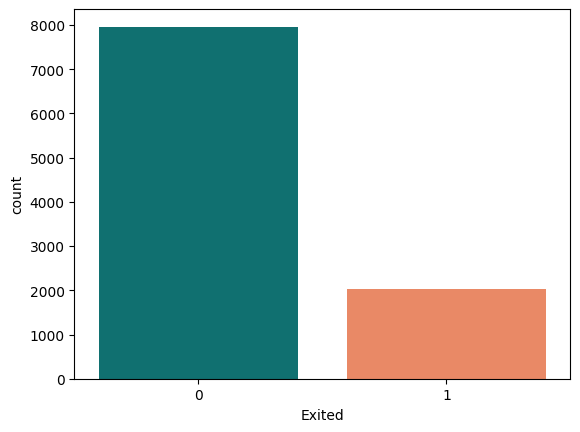

In [303]:
#Data Visualisation

sns.countplot(x="Exited",data=data,palette=["teal","coral"])
plt.show

In [304]:
data["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

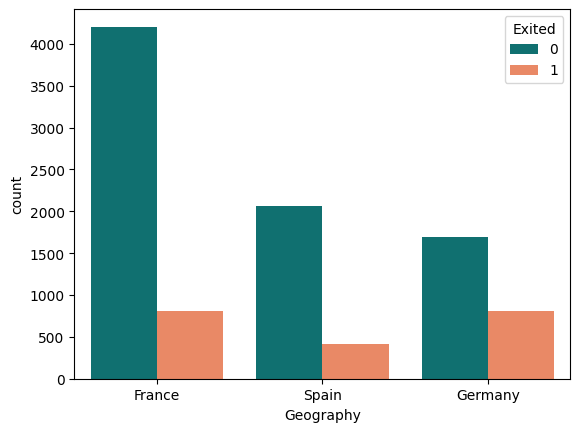

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


In [305]:
sns.countplot(x="Geography",hue="Exited",palette=["teal","coral"],data=data)
plt.show()
pd.crosstab(data["Geography"],data["Exited"])

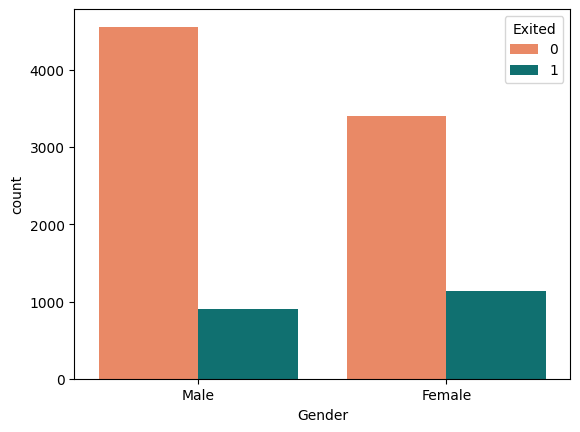

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


In [306]:
sns.countplot(x="Gender",hue="Exited",palette=["coral","teal"],data=data)
plt.show()
pd.crosstab(data["Gender"],data["Exited"])

In [307]:
#Data Analysis

data.isna().sum()   #no missing values
data=pd.get_dummies(columns=["Geography","Gender"],data=data)

x=data.drop(['Exited', 'Surname'],axis=1)
y=data["Exited"]

from imblearn.over_sampling import SMOTE
x_sample,y_sample=SMOTE().fit_resample(x,y)

x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size=0.3, random_state=3)
x_train.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
3876,504,40,5,0.000000,2,0,0,146703.360000,False,False,True,False,True
14454,578,38,4,152646.582254,2,0,0,25523.124844,True,True,False,False,True


In [308]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [309]:
#Logistic Regression

model1=LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [310]:
#score of training set
model1.score(x_train,y_train)

0.8433799784714747

In [311]:
#score of test set
model1.score(x_test,y_test)

0.8386354123064044

In [312]:
#Decision Tree Classifier

model2=DecisionTreeClassifier(max_depth=9)
model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=9)

In [313]:
model2.score(x_train,y_train)

0.8826695371367062

In [314]:
model2.score(x_test,y_test)

0.848890749267476

In [315]:
#Bagging Classifier

model3=BaggingClassifier(n_estimators=60,max_samples=35)
model3.fit(x_train,y_train)

BaggingClassifier(max_samples=35, n_estimators=60)

In [316]:
model3.score(x_train,y_train)

0.7996950125583064

In [317]:
model3.score(x_test,y_test)

0.7948932607785685

In [318]:
#AdaBoost Classifier

model4=AdaBoostClassifier(n_estimators=70,learning_rate=0.35)
model4.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.35, n_estimators=70)

In [319]:
model4.score(x_train,y_train)

0.8623071402942232

In [320]:
model4.score(x_test,y_test)

0.8622854750941816

In [321]:
#Gradient Boosting

model5=GradientBoostingClassifier(learning_rate=0.49)
model5.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.49)

In [322]:
model5.score(x_train,y_train)

0.9189989235737352

In [323]:
model5.score(x_test,y_test)

0.8807032231059021

In [324]:
#Random Forest Classifier

model6=RandomForestClassifier(n_estimators=50,max_depth=10)
model6.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=50)

In [325]:
model6.score(x_train,y_train)

0.9171151776103337

In [326]:
model6.score(x_test,y_test)

0.8781917120133947

In [327]:
#KNN Classifier

model7=KNeighborsClassifier(n_neighbors=7,leaf_size=35)
model7.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=35, n_neighbors=7)

In [328]:
model7.score(x_train,y_train)

0.891280947255113

In [329]:
model7.score(x_test,y_test)

0.8664713269150273

In [330]:
#SVC

model8=SVC(probability=True)
model8.fit(x_train,y_train)

SVC(probability=True)

In [331]:
model8.score(x_train,y_train)

0.8886795837818443

In [332]:
model8.score(x_test,y_test)

0.8825868564252826

In [333]:
#Choosing best Model
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

lr_probs = model1.predict_proba(x_test)
de_probs = model2.predict_proba(x_test)
bgc_probs =model3.predict_proba(x_test)
adb_probs =model4.predict_proba(x_test)
gb_probs =model5.predict_proba(x_test)
rf_probs = model6.predict_proba(x_test)
kn_probs = model7.predict_proba(x_test)
svc_probs = model8.predict_proba(x_test)

In [334]:
lr_probs = lr_probs[:,1]
de_probs = de_probs [:,1]
bgc_probs = bgc_probs[:,1]
adb_probs = adb_probs[:,1]
gb_probs = gb_probs[:,1]
rf_probs = rf_probs[:,1]
svc_probs = svc_probs [:, 1]
kn_probs = kn_probs[:,1]

In [335]:
lr_auc = roc_auc_score(y_test,lr_probs )
de_auc = roc_auc_score(y_test, de_probs)
bgc_auc = roc_auc_score(y_test,bgc_probs )
adb_auc = roc_auc_score(y_test,adb_probs )
gb_auc = roc_auc_score(y_test,gb_probs )
rf_auc = roc_auc_score(y_test,rf_probs )
svc_auc = roc_auc_score (y_test, svc_probs)
kn_auc = roc_auc_score (y_test, kn_probs)

In [336]:
print('Logistic Regression : AUROC - % 0.3f' % (lr_auc))
print('Decision Tree : AUROC - % 0.3f' % (de_auc))
print('Bagging Classifier : AUROC - % 0.3f' % (bgc_auc))
print('Ada boost Classifier : AUROC - % 0.3f' % (adb_auc))
print('Gradient Boosting : AUROC - % 0.3f' % (gb_auc))
print('Random forest : AUROC = % 0.3f ' % (rf_auc))
print('Support Vector Machine : AUROC = % 0.3f' % (svc_auc))
print('KNN: AUROC = % 0.3f' % (kn_auc))

plt.show()

Logistic Regression : AUROC -  0.918
Decision Tree : AUROC -  0.917
Bagging Classifier : AUROC -  0.881
Ada boost Classifier : AUROC -  0.938
Gradient Boosting : AUROC -  0.952
Random forest : AUROC =  0.949 
Support Vector Machine : AUROC =  0.947
KNN: AUROC =  0.930


In [337]:
lr_fpr, lr_tpr, _ = roc_curve (y_test , lr_probs)
de_fpr, de_tpr, _ = roc_curve (y_test , de_probs)
bgc_fpr, bgc_tpr, _ = roc_curve (y_test , bgc_probs)
adb_fpr, adb_tpr, _ = roc_curve (y_test , adb_probs)
gb_fpr, gb_tpr, _ = roc_curve (y_test , gb_probs)
rf_fpr, rf_tpr , _ = roc_curve (y_test , rf_probs)
svc_fpr, svc_tpr, _ = roc_curve (y_test , svc_probs)
kn_fpr, kn_tpr , _ = roc_curve (y_test , kn_probs)

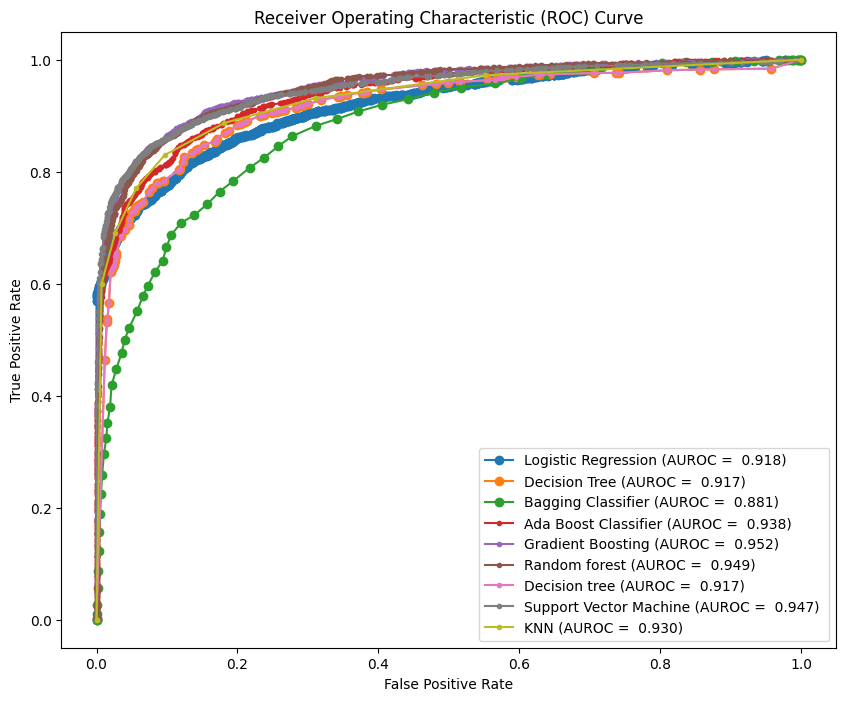

In [338]:
fig, ax=plt.subplots(figsize=(10,8))

plt.plot(lr_fpr, lr_tpr ,marker ='o',label = 'Logistic Regression (AUROC = % 0.3f) ' % lr_auc)
plt.plot(de_fpr, de_tpr ,marker ='o',label = 'Decision Tree (AUROC = % 0.3f) ' % de_auc)
plt.plot(bgc_fpr, bgc_tpr ,marker ='o',label = 'Bagging Classifier (AUROC = % 0.3f) ' % bgc_auc)
plt.plot(adb_fpr, adb_tpr ,marker ='.',label = 'Ada Boost Classifier (AUROC = % 0.3f) ' % adb_auc)
plt.plot(gb_fpr, gb_tpr,marker= '.', label='Gradient Boosting (AUROC = % 0.3f)' % gb_auc)
plt.plot(rf_fpr, rf_tpr,marker= '.', label='Random forest (AUROC = % 0.3f)' % rf_auc)
plt.plot(de_fpr, de_tpr, marker='.',label='Decision tree (AUROC = % 0.3f) ' % de_auc)
plt.plot(svc_fpr, svc_tpr ,marker='.',label = 'Support Vector Machine (AUROC = % 0.3f) ' % svc_auc)
plt.plot(kn_fpr, kn_tpr ,marker ='.',label = 'KNN (AUROC = % 0.3f) ' % kn_auc)

plt.xlabel("False Positive Rate")
plt.ylabel ('True Positive Rate')

plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
    
plt.show()

In [339]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

y_pred = model5.predict(x_test)

print("Optimal Model: Gradient Boosting")
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))

Optimal Model: Gradient Boosting
Accuracy:  0.8807032231059021
Precision:  0.8995173321632295
Recall:  0.8573818485989126


<Axes: >

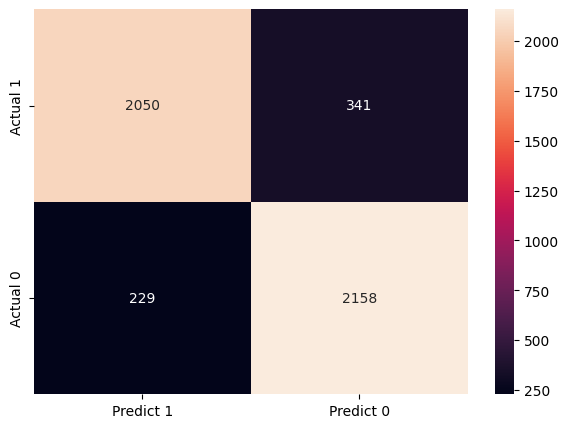

In [340]:
#Model Accuracy and Prediction Heat Map
cm=metrics.confusion_matrix(y_test,y_pred,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["Actual 1","Actual 0"]],
                  columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')